In [131]:
#important Libraries 

import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/data\db\collection-0--2641255188981931325.wt
/data\db\collection-0--7375170263173339037.wt
/data\db\collection-0-4572410231294925841.wt
/data\db\collection-0-7067964211854103265.wt
/data\db\collection-0-8938152883700851741.wt
/data\db\collection-2-7067964211854103265.wt
/data\db\collection-4-7067964211854103265.wt
/data\db\index-1--2641255188981931325.wt
/data\db\index-1--7375170263173339037.wt
/data\db\index-1-4572410231294925841.wt
/data\db\index-1-7067964211854103265.wt
/data\db\index-1-8938152883700851741.wt
/data\db\index-3-7067964211854103265.wt
/data\db\index-5-7067964211854103265.wt
/data\db\index-6-7067964211854103265.wt
/data\db\mongod.lock
/data\db\sizeStorer.wt
/data\db\storage.bson
/data\db\WiredTiger
/data\db\WiredTiger.lock
/data\db\WiredTiger.turtle
/data\db\WiredTiger.wt
/data\db\WiredTigerLAS.wt
/data\db\_mdb_catalog.wt
/data\db\diagnostic.data\metrics.2018-08-20T15-03-55Z-00000
/data\db\diagnostic.data\metrics.2018-08-24T17-42-51Z-00000
/data\db\diagnostic.data\metr

# Covid-19 World data visualization

In [132]:
df=pd.read_csv("data-world/covid_19_data.csv")
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [133]:
df.shape

(52469, 8)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52469 entries, 0 to 52468
Data columns (total 8 columns):
SNo                52469 non-null int64
ObservationDate    52469 non-null object
Province/State     31750 non-null object
Country/Region     52469 non-null object
Last Update        52469 non-null object
Confirmed          52469 non-null float64
Deaths             52469 non-null float64
Recovered          52469 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 3.2+ MB


In [135]:
df['ObservationDate']=pd.to_datetime(df['ObservationDate'])
df['Last Update']=pd.to_datetime(df['Last Update'])
df['Confirmed']=df['Confirmed'].astype('int')
df['Deaths']=df['Deaths'].astype('int')
df['Recovered']=df['Recovered'].astype('int')

Since the final count of cases is present on 10th June 2020 we will create a separate dataframe for the same

In [136]:
from datetime import date
recent=df[['ObservationDate']][-1:].max()
df_update=df.loc[df.ObservationDate==pd.Timestamp(recent['ObservationDate'])]
df_update

SNo ObservationDate      Province/State  Country/Region  \
51740  51741      2020-06-28                 NaN     Afghanistan   
51741  51742      2020-06-28                 NaN         Albania   
51742  51743      2020-06-28                 NaN         Algeria   
51743  51744      2020-06-28                 NaN         Andorra   
51744  51745      2020-06-28                 NaN          Angola   
...      ...             ...                 ...             ...   
52464  52465      2020-06-28           Zacatecas          Mexico   
52465  52466      2020-06-28  Zakarpattia Oblast         Ukraine   
52466  52467      2020-06-28   Zaporizhia Oblast         Ukraine   
52467  52468      2020-06-28            Zhejiang  Mainland China   
52468  52469      2020-06-28     Zhytomyr Oblast         Ukraine   

              Last Update  Confirmed  Deaths  Recovered  
51740 2020-06-29 04:33:44      30967     721      12604  
51741 2020-06-29 04:33:44       2402      55       1384  
51742 2020-06-29 04:33:44      13273     897       9371  
51743 2020-06-29 04:33:44        855      52        799  
51744 2020-06-29 04:33:44        267      11         81  
...                   ...        ...     ...        ...  
52464 2020-06-29 04:33:44        842      91        570  
52465 2020-06-29 04:33:44       2726      84        943  
52466 2020-06-29 04:33:44        568      17        417  
52467 2020-06-29 04:33:44       1269       1       1267  
52468 2020-06-29 04:33:44       1396      29        746  

[729 rows x 8 columns]

In [137]:
df_update.isnull().sum()

SNo                  0
ObservationDate      0
Province/State     169
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

Out of the 39347 records we are now left with only 725 and many of the records dont have a Province defined.
These are mostly provinces that are not part of China

Wherever Province is null, we replace it with the Country name and we group Mainland China and China together in China

In [138]:
df_update['Province/State']=df_update.apply(lambda x: x['Country/Region']
if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)

df['Province/State']=df.apply(lambda x: x['Country/Region'] if pd.isnull
(x['Province/State']) else x['Province/State'],axis=1)

In [139]:
df_update['Country/Region']=df_update.apply(lambda x:'China' if x['Country/Region']
=='Mainland China' else x['Country/Region'],axis=1)

df_update['Country/Region']=df.apply(lambda x:'China' if x['Country/Region']
=='Mainland China' else x['Country/Region'],axis=1)

In [140]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_update['ProvinceID'] = le.fit_transform(df_update['Province/State'])
df_update['CountryID']=le.fit_transform(df_update['Country/Region'])
df_update.head()

SNo ObservationDate Province/State Country/Region  \
51740  51741      2020-06-28    Afghanistan    Afghanistan   
51741  51742      2020-06-28        Albania        Albania   
51742  51743      2020-06-28        Algeria        Algeria   
51743  51744      2020-06-28        Andorra        Andorra   
51744  51745      2020-06-28         Angola         Angola   

              Last Update  Confirmed  Deaths  Recovered  ProvinceID  CountryID  
51740 2020-06-29 04:33:44      30967     721      12604           3          0  
51741 2020-06-29 04:33:44       2402      55       1384          10          1  
51742 2020-06-29 04:33:44      13273     897       9371          12          2  
51743 2020-06-29 04:33:44        855      52        799          22          3  
51744 2020-06-29 04:33:44        267      11         81          23          4

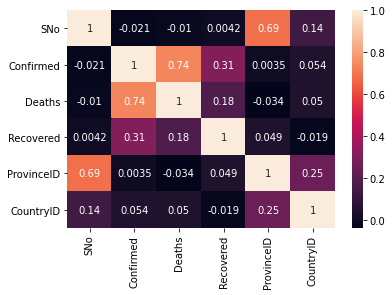

In [141]:
corr=df_update.corr()
sns.heatmap(corr,annot=True)

# Printing the unique countries and their count

In [142]:
print(df['Country/Region'].unique())
print("\n Number of Countries impacted by Covid-19 : ",len(df['Country/Region'].unique()))

['Mainland China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe Islands' 'Gibraltar' 'Liechtenstein' 'Poland' 'Tunisia

# Representation of confirmed cases per country

US leads with 27.18% of the confirmed cases all over the world. This scenario is in total contrast to the initial days when China accounted for nearly 99% of the cases. The growth rate for US has slowed down in the past few days. The numbers in Brazil and Russia have increased drastically placing them in 2nd and 3rd spot.India moved to 5th place with respect to the number of confirmed cases taking over Spain.

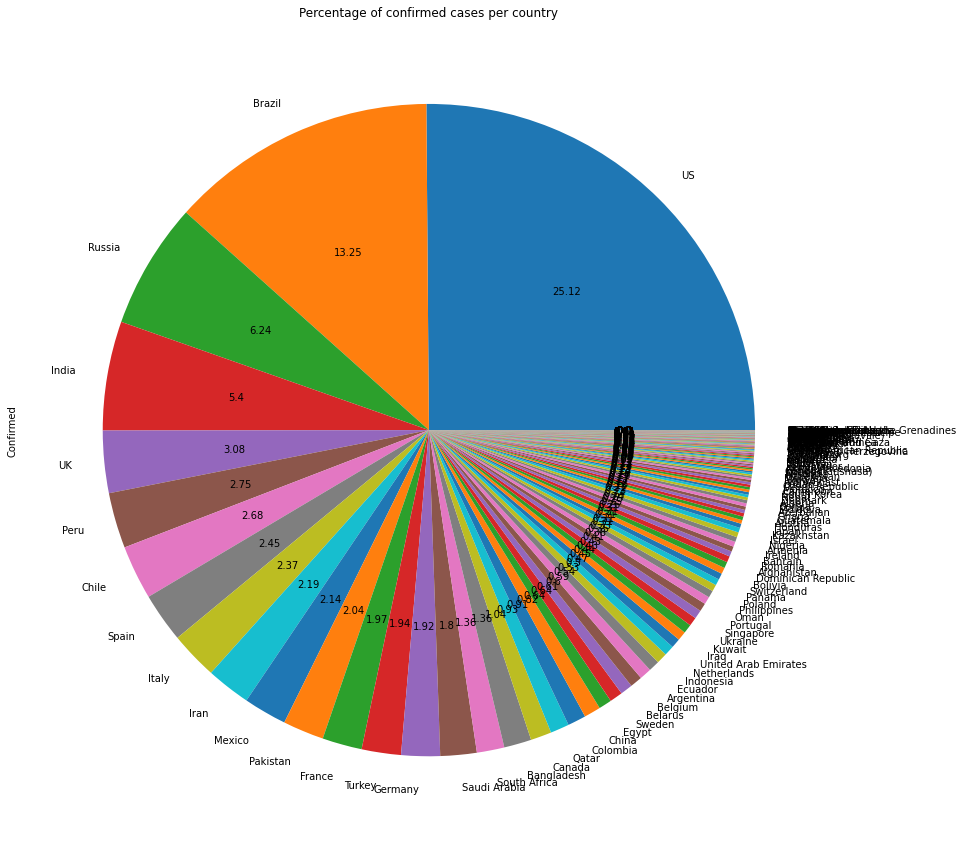

In [143]:
fig=plt.figure(figsize=(15,15))
conf_per_country = df_update.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False)
conf_sum=df_update['Confirmed'].sum()
def absolute_value(val):
    a=val
    return (np.round(a,2))
conf_per_country.plot(kind="pie",title='Percentage of confirmed cases per country'
,autopct=absolute_value)
plt.show()

In [144]:
group_cases=df_update[['Confirmed','Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Confirmed',ascending=False).head()
group_cases=group_cases.reset_index()
group_cases

Country/Region  Confirmed  Recovered  Deaths
0             US    2548996     685164  125803
1         Brazil    1344143     746018   57622
2         Russia     633563     398436    9060
3          India     548318     321723   16475
4             UK     312640       1364   43634

Germany leads in the recovery rate in the top 10 countries affected by Covid-19.

In [145]:
group_cases['Recovery Rate']=round(group_cases['Recovered']/group_cases['Confirmed'],2)
group_cases['Death Rate']=round(group_cases['Deaths']/group_cases['Confirmed'],2)
group_cases=group_cases.sort_values(by='Confirmed',ascending=False)
group_cases.style.background_gradient(cmap='Greens')


From the below stacked barplot we see that highest number of confirmed cases is in US now

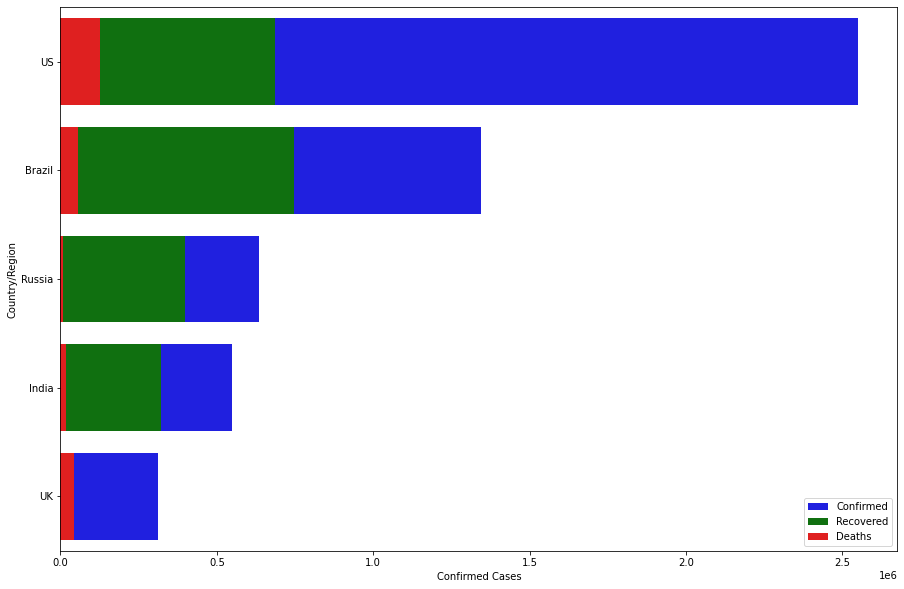

In [146]:
f,ax=plt.subplots(figsize=(15,10))
bar1=sns.barplot(x='Confirmed',y='Country/Region',data=group_cases,label='Confirmed',color='b')
bar2=sns.barplot(x='Recovered',y='Country/Region',data=group_cases,label='Recovered',color='g')
bar3=sns.barplot(x='Deaths',y='Country/Region',data=group_cases,label='Deaths',color='r')
ax.legend(loc=4, ncol = 1)
plt.xlabel("Confirmed Cases")
plt.show()


The ratio of recovered and death cases are shown below for the top 5 countries that have reported 
max deaths. UK has seen more deaths than recoveries while US leads in the number of deaths due 
to COVID19

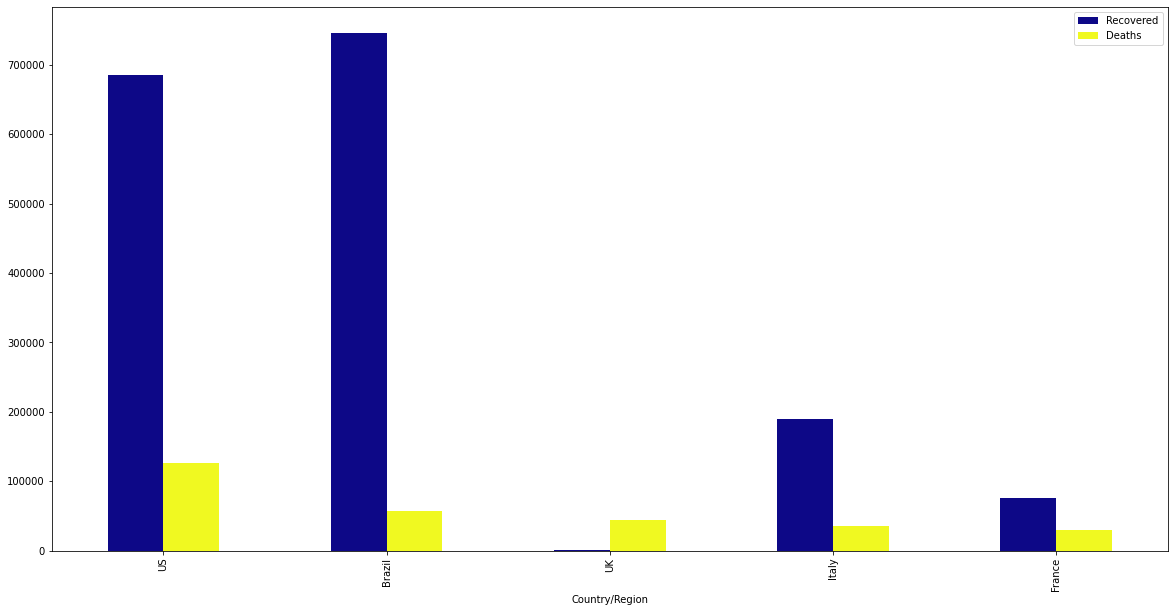

In [147]:
group_cases=df_update[['Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Deaths',ascending=False).head()
group_cases.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

# Time Plot of Covid-19 in world

In [148]:
corona_data=pd.read_csv('data-world/covid_19_data.csv')
import plotly.express as px
choro_map=px.choropleth(corona_data, 
                    locations="Country/Region", 
                    locationmode = "country names",
                    color="Confirmed", 
                    hover_name="Country/Region", 
                    animation_frame="ObservationDate"
                   )

choro_map.update_layout(
    title_text = 'Global Spread of Coronavirus',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
choro_map.show()

# Covid-19 India Data Visualization Upto 10 june

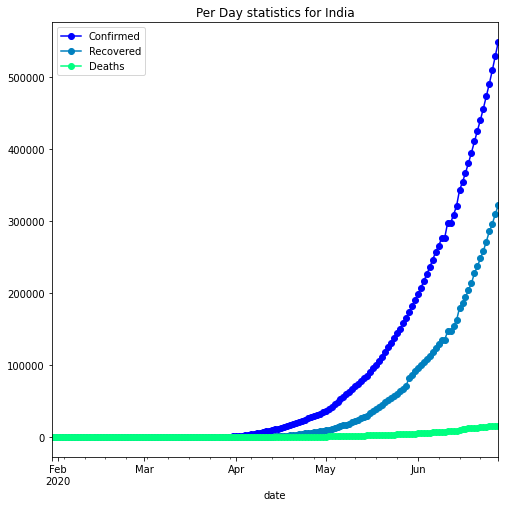

In [149]:
india_cases_complete=df.loc[df['Country/Region']=='India']
india_cases_complete['date'] = india_cases_complete['ObservationDate'].dt.date
india_cases_complete['date']=pd.to_datetime(india_cases_complete['date'])
india_cases_complete = india_cases_complete[india_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = india_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),colormap='winter',title='Per Day statistics for India',marker='o')
num_plot_india=num_plot.reset_index()

In [150]:
num_plot_india['Confirmed Case Increase']=0
num_plot_india['Death Case Increase']=0
num_plot_india['Confirmed Case Increase'][0]=0
num_plot_india['Death Case Increase'][0]=0
for i in range(1,num_plot_india.shape[0]):
    num_plot_india['Confirmed Case Increase'][i]=-(num_plot_india.iloc[i-1][1]-num_plot_india.iloc[i][1])
    num_plot_india['Death Case Increase'][i]=-(num_plot_india.iloc[i-1][3]-num_plot_india.iloc[i][3])
num_plot_india.tail(10)

date  Confirmed  Recovered  Deaths  Confirmed Case Increase  \
141 2020-06-19     395048     213831   12948                    14516   
142 2020-06-20     410461     227756   13254                    15413   
143 2020-06-21     425282     237196   13699                    14821   
144 2020-06-22     440215     248190   14011                    14933   
145 2020-06-23     456183     258685   14476                    15968   
146 2020-06-24     473105     271697   14894                    16922   
147 2020-06-25     490401     285637   15301                    17296   
148 2020-06-26     508953     295881   15685                    18552   
149 2020-06-27     528859     309713   16095                    19906   
150 2020-06-28     548318     321723   16475                    19459   

     Death Case Increase  
141                  375  
142                  306  
143                  445  
144                  312  
145                  465  
146                  418  
147                  407  
148                  384  
149                  410  
150                  380

7th June has recorded highest number of COVID19 confirmed cases in India in a day (10864). We notice 
a peak in every 4-5 days however in the last few days the peak in cases have been increasing almost 
everyday.10th June does not show correct number of confirmed cases

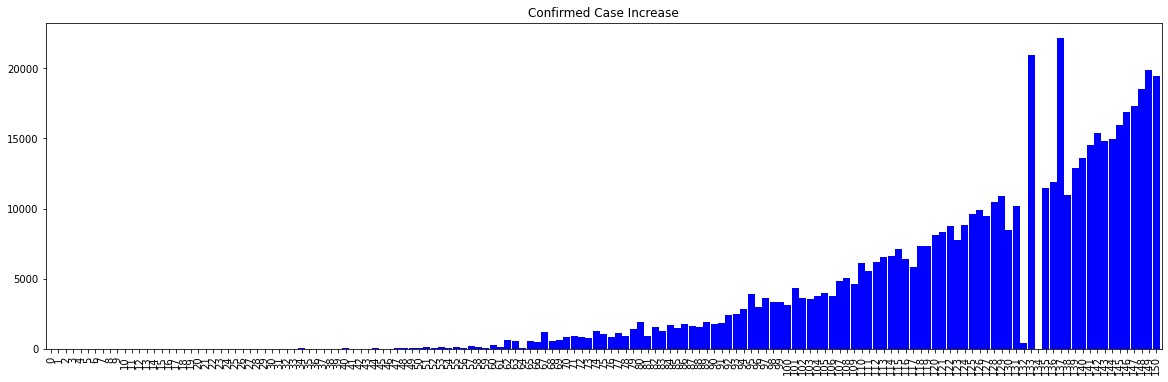

In [151]:
num_plot_india['Confirmed Case Increase'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Confirmed Case Increase')
plt.show()


There seems to be an issue with an extra death reported on Day 50 due to which on Day 51 we see a downtrend.Highest number of deaths reported in a day is 297 for India which was on 6th June.

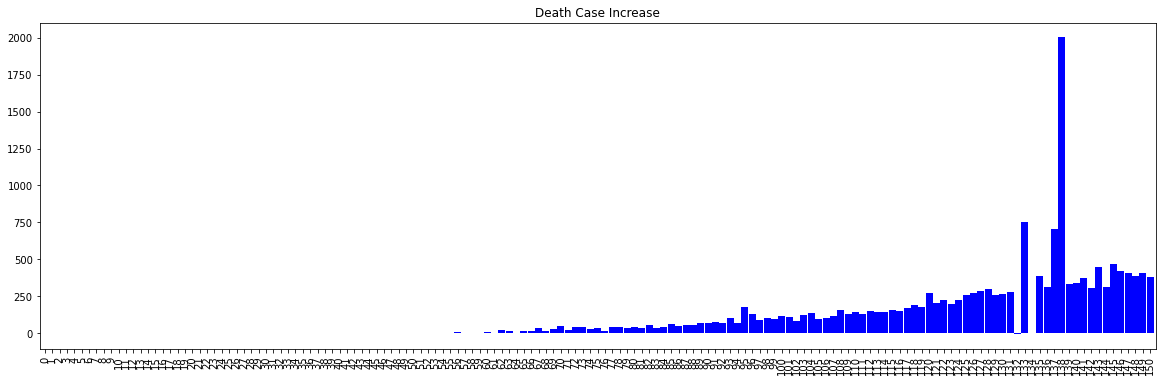

In [152]:
num_plot_india['Death Case Increase'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Death Case Increase')
plt.show()

# Trajectories for some of the countries

Trajectory of India is increasing almost linearly just like US 

In [153]:
from sklearn.preprocessing import LabelEncoder
from plotly.offline import iplot, init_notebook_mode
import math
import bokeh 
import matplotlib.pyplot as plt
import plotly.express as px
from urllib.request import urlopen
import json
from dateutil import parser
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import row, column
from bokeh.resources import INLINE
from bokeh.io import output_notebook
from bokeh.models import Span
import warnings
warnings.filterwarnings("ignore")
output_notebook(resources=INLINE)
le=LabelEncoder()

df.rename(columns={'Country/Region': 'Country', 'ObservationDate': 'Date'}, inplace=True)
df = df.fillna('unknown')
df['Country'] = df['Country'].str.replace('US','United States')
df['Country'] = df['Country'].str.replace('UK','United Kingdom') 
df['Country'] = df['Country'].str.replace('Mainland China','China')
df['Code']=le.fit_transform(df['Country'])
virus_data = df
#print(virus_data.head())
#print(len(virus_data))

top_country = virus_data.loc[virus_data['Date'] == virus_data['Date'].iloc[-1]]
top_country = top_country.groupby(['Code','Country'])['Confirmed'].sum().reset_index()
top_country = top_country.sort_values('Confirmed', ascending=False)
top_country = top_country[:60]
top_country_codes = top_country['Country']
top_country_codes = list(top_country_codes)
#print(top_country)

countries = virus_data[virus_data['Country'].isin(top_country_codes)]
countries_day = countries.groupby(['Date','Code','Country'])['Confirmed','Deaths','Recovered'].sum().reset_index()
#print(countries_day)


exponential_line_x = []
exponential_line_y = []
for i in range(16):
    exponential_line_x.append(i)
    exponential_line_y.append(i)

china = countries_day.loc[countries_day['Code']==43]

new_confirmed_cases_china = []
new_confirmed_cases_china.append( list(china['Confirmed'])[0] - list(china['Deaths'])[0] 
                           - list(china['Recovered'])[0] )

for i in range(1,len(china)):

    new_confirmed_cases_china.append( list(china['Confirmed'])[i] - 
                                     list(china['Deaths'])[i] - 
                                     list(china['Recovered'])[i])
    
    
italy = countries_day.loc[countries_day['Code']==102]

new_confirmed_cases_ita = []
new_confirmed_cases_ita.append( list(italy['Confirmed'])[0] - list(italy['Deaths'])[0] 
                           - list(italy['Recovered'])[0] )

for i in range(1,len(italy)):
    
    new_confirmed_cases_ita.append( list(italy['Confirmed'])[i] - 
                                  list(italy['Deaths'])[i] - 
                                  list(italy['Recovered'])[i])
    
    
#skorea = countries_day.loc[countries_day['Code']==186]

#new_confirmed_cases_skorea = []
#new_confirmed_cases_skorea.append( list(skorea['Confirmed'])[0] - list(skorea['Deaths'])[0] 
                   #        - list(skorea['Recovered'])[0] )

#for i in range(1,len(skorea)):
    
 #   new_confirmed_cases_skorea.append( list(skorea['Confirmed'])[i] - 
  #                                   list(skorea['Deaths'])[i] - 
  #                                  list(skorea['Recovered'])[i])
    


    
india = countries_day.loc[countries_day['Code']==96]

new_confirmed_cases_india = []
new_confirmed_cases_india.append( list(india['Confirmed'])[0] - list(india['Deaths'])[0] 
                           - list(india['Recovered'])[0] )

for i in range(1,len(india)):
    
    new_confirmed_cases_india.append( list(india['Confirmed'])[i] - 
                                     list(india['Deaths'])[i] - 
                                    list(india['Recovered'])[i])
    

spain = countries_day.loc[countries_day['Code']==188]

new_confirmed_cases_spain = []
new_confirmed_cases_spain.append( list(spain['Confirmed'])[0] - list(spain['Deaths'])[0] 
                           - list(spain['Recovered'])[0] )

for i in range(1,len(spain)):
    
    new_confirmed_cases_spain.append( list(spain['Confirmed'])[i] - 
                                     list(spain['Deaths'])[i] - 
                                    list(spain['Recovered'])[i])
    

us = countries_day.loc[countries_day['Code']==211]

new_confirmed_cases_us = []
new_confirmed_cases_us.append( list(us['Confirmed'])[0] - list(us['Deaths'])[0] 
                           - list(us['Recovered'])[0] )

for i in range(1,len(us)):
    
    new_confirmed_cases_us.append( list(us['Confirmed'])[i] - 
                                     list(us['Deaths'])[i] - 
                                    list(us['Recovered'])[i])
    
    
german = countries_day.loc[countries_day['Code']==77]

new_confirmed_cases_german = []
new_confirmed_cases_german.append( list(german['Confirmed'])[0] - list(german['Deaths'])[0] 
                           - list(german['Recovered'])[0] )

for i in range(1,len(german)):
    
    new_confirmed_cases_german.append( list(german['Confirmed'])[i] - 
                                     list(german['Deaths'])[i] - 
                                    list(german['Recovered'])[i])
    
p1=figure(plot_width=800, plot_height=550, title="COVID 2019 Trajectories for Countries")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Total number of Confirmed Cases (Log scale)'
p1.yaxis.axis_label = 'Total number of active cases (Log scale)'


p1.line(exponential_line_x, exponential_line_y, line_dash="4 4", line_width=1)

p1.line(np.log(list(china['Confirmed'])), np.log(new_confirmed_cases_china), color='red', 
        legend='China', line_width=3)
p1.circle(np.log(list(china['Confirmed'])[-1]), np.log(new_confirmed_cases_china[-1]), size=5)

p1.line(np.log(list(italy['Confirmed'])), np.log(new_confirmed_cases_ita), color='blue', 
        legend='Italy', line_width=3)
p1.circle(np.log(list(italy['Confirmed'])[-1]), np.log(new_confirmed_cases_ita[-1]), size=5)



#p1.line(np.log(list(skorea['Confirmed'])), np.log(new_confirmed_cases_skorea), color='violet', 
#        legend='South Korea', line_width=3)
#p1.circle(np.log(list(skorea['Confirmed'])[-1]), np.log(new_confirmed_cases_skorea[-1]), size=5)


p1.line(np.log(list(india['Confirmed'])), np.log(new_confirmed_cases_india), color='orange', 
        legend='India', line_width=3)
p1.circle(np.log(list(india['Confirmed'])[-1]), np.log(new_confirmed_cases_india[-1]), size=5)

p1.line(np.log(list(spain['Confirmed'])), np.log(new_confirmed_cases_spain), color='brown', 
        legend='Spain', line_width=3)
p1.circle(np.log(list(spain['Confirmed'])[-1]), np.log(new_confirmed_cases_spain[-1]), size=5)

p1.line(np.log(list(us['Confirmed'])), np.log(new_confirmed_cases_us), color='green', 
        legend='United States', line_width=3)
p1.circle(np.log(list(us['Confirmed'])[-1]), np.log(new_confirmed_cases_us[-1]), size=5)

p1.line(np.log(list(german['Confirmed'])), np.log(new_confirmed_cases_german), color='black', 
        legend='Germany', line_width=3)
p1.circle(np.log(list(german['Confirmed'])[-1]), np.log(new_confirmed_cases_german[-1]), size=5)

p1.legend.location = "bottom_right"
#output_file("coronavirus.html", title="COVID2019 Trajectory")
show(p1)




Loading BokehJS ...

# Data Resource of Covid-19 India

In [154]:
import requests 
import io
age_group = pd.read_csv("data/AgeGroupDetails.csv")
india_covid_19=pd.read_csv("data/covid_19_india.csv")
hospitals_beds=pd.read_csv("data/HospitalBedsIndia.csv")
individual_details=pd.read_csv("data/IndividualDetails.csv")
ICMR_labs=pd.read_csv("data/ICMRTestingLabs.csv")
state_testing=pd.read_csv("data/StatewiseTestingDetails.csv")
pos=pd.read_csv('data/UTM ZONES of INDIA.csv')
statewise_cases=pd.DataFrame(india_covid_19.groupby(['State/UnionTerritory'])['Confirmed','Deaths','Cured'].max().reset_index())
last=statewise_cases
ind_grp=last.merge(pos , left_on='State/UnionTerritory', right_on='State / Union Territory')

In [155]:
#removal of unassigned State/UnionTerritory
india_covid_19.rename(columns={'State/UnionTerritory': 'State', 'Cured': 'Recovered'}, inplace=True)
unassigned=india_covid_19[india_covid_19['State']=='Unassigned'].index
india_covid_19.drop(unassigned,axis=0,inplace=True)
unassigned1=india_covid_19[india_covid_19['State']=='Nagaland#'].index
india_covid_19.drop(unassigned1,axis=0,inplace=True)
unassigned2=india_covid_19[india_covid_19['State']=='Jharkhand#'].index
india_covid_19.drop(unassigned2,axis=0,inplace=True)
unassigned3=india_covid_19[india_covid_19['State']=='Madhya Pradesh#'].index
india_covid_19.drop(unassigned3,axis=0,inplace=True)
unassigned4=india_covid_19[india_covid_19['State']=='Cases being reassigned to states'].index
india_covid_19.drop(unassigned4,axis=0,inplace=True)

# Map View

In [156]:
import folium
map = folium.Map(location=[20.5937, 78.9629], zoom_start=4,tiles='cartodbpositron')

for lat, lon,state,Confirmed,Recovered,Deaths in zip(ind_grp['Latitude'], ind_grp['Longitude'],ind_grp['State/UnionTerritory'],ind_grp['Confirmed'],ind_grp['Cured'],ind_grp['Deaths']):
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='YlOrRd',
                      popup =(
                    'State/UnionTerritory: ' + str(state) + '<br>'
                    'Confirmed: ' + str(Confirmed) + '<br>'
                      'Recovered: ' + str(Recovered) + '<br>'
                      'Deaths: ' + str(Deaths) + '<br>'),

                        fill_color='red',
                        fill_opacity=0.7 ).add_to(map)
map

# Heat Map 

In [157]:
from folium.plugins import HeatMap
m = folium.Map(location = [20.5937, 78.9629], zoom_start = 4,tiles='cartodbpositron',columns = ['State/UnionTerritory','Confirmed'],)
heat_data=[[row['Latitude'],row['Longitude']] for index, row in ind_grp.iterrows()]
HeatMap(heat_data,radius=16.5,blur= 5.5).add_to(m)

m

# Tree Plot

In [158]:
statewise_cases = pd.DataFrame(india_covid_19.groupby(['State'])['Confirmed', 'Deaths', 'Recovered'].max().reset_index())
statewise_cases["Country"] = "India" 
fig = px.treemap(statewise_cases, path=['Country','State'], values='Confirmed',color='Confirmed', hover_data=['State'])
fig.show()

# Gender-wise distribution of the COVID-19 cases

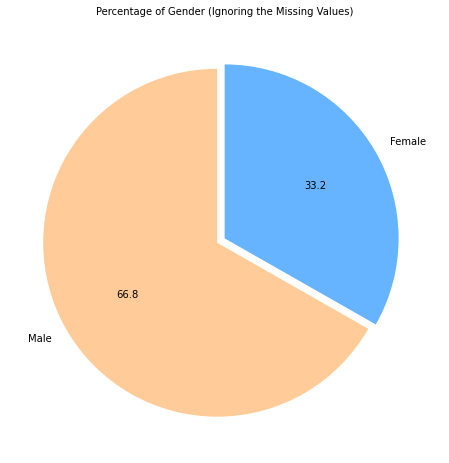

In [159]:
labels=['Male','Female']
sizes=[]
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])
explode=(0.05,0)
colors = ['#ffcc99','#66b3ff']
plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f',startangle=90)
plt.title('Percentage of Gender (Ignoring the Missing Values)',fontsize = 10)
plt.show ()

In [160]:
age_group.head()

Sno AgeGroup  TotalCases Percentage
0    1      0-9          22      3.18%
1    2    10-19          27      3.90%
2    3    20-29         172     24.86%
3    4    30-39         146     21.10%
4    5    40-49         112     16.18%

# Age Distribution of Covid-19 cases in India

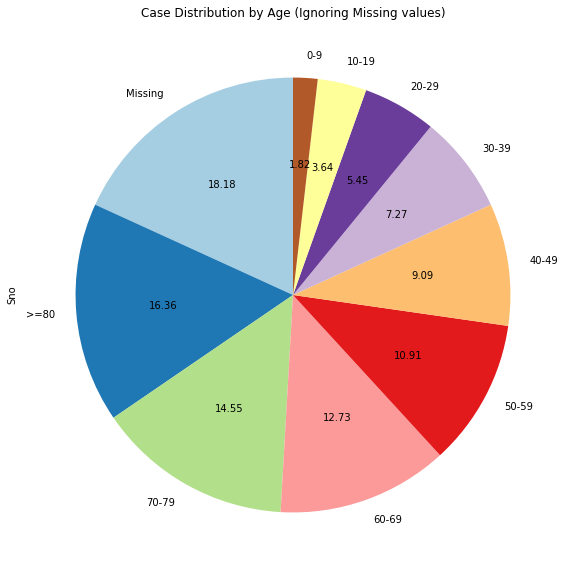

In [161]:
fig=plt.figure(figsize=(10,10))
age_group=age_group.iloc[:,:]
age_dist_india = age_group.groupby('AgeGroup')['Sno'].sum().sort_values(ascending=False)
def absolute_value(val):
    a  = val
    return (np.round(a,2))
age_dist_india.plot(kind="pie",title='Case Distribution by Age (Ignoring Missing values)',autopct=absolute_value,colormap='Paired',startangle=90)

plt.show ()

Statewise Recovery and Death Rate in India

1)Maharashtra has the highest number of Confirmed cases in India and is still contributing maximum daily cases among all the states in India.


2) Punjab has highest recovery rate among the top 20 hotspot states in India as Kerala reported fresh cases.

3)Gujarat has the highest death rate.

4)Andaman and Nicobar Islands has highest Recovery rate.

In [162]:
india_covid_19['Deaths']=india_covid_19['Deaths'].replace(['0#','NaN'],0)
india_covid_19['Deaths']=india_covid_19['Deaths'].astype('int')

In [163]:
india_covid_19.tail()

Sno      Date     Time          State ConfirmedIndianNational  \
3561  3562  29/06/20  8:00 AM      Telangana                       -   
3562  3563  29/06/20  8:00 AM        Tripura                       -   
3563  3564  29/06/20  8:00 AM    Uttarakhand                       -   
3564  3565  29/06/20  8:00 AM  Uttar Pradesh                       -   
3565  3566  29/06/20  8:00 AM    West Bengal                       -   

     ConfirmedForeignNational  Recovered  Deaths  Confirmed  
3561                        -       5172     247      14419  
3562                        -       1079       1       1346  
3563                        -       2018      38       2823  
3564                        -      14808     660      22147  
3565                        -      11193     639      17283

In [164]:
state_details=pd.pivot_table(india_covid_19,values=['Confirmed','Deaths','Recovered'],index='State',aggfunc='max')
state_details['Recovery Rate']=round(state_details['Recovered']/state_details['Confirmed'],2)
state_details['Death Rate']=round(state_details['Deaths']/state_details['Confirmed'],2)
state_details=state_details.sort_values(by='Confirmed',ascending=False)
state_details.style.background_gradient(cmap='PuBuGn')

In [165]:
state_testing.tail()

Date        State  TotalSamples Negative  Positive
2533  2020-06-24  West Bengal      429766.0      NaN   15173.0
2534  2020-06-25  West Bengal      439258.0      NaN   15648.0
2535  2020-06-26  West Bengal      448795.0      NaN   16190.0
2536  2020-06-27  West Bengal      458343.0      NaN   16711.0
2537  2020-06-28  West Bengal      468906.0      NaN   17283.0

# Statewise Testing done in India till 10th June 

In [166]:
testing=state_testing.groupby('State')['TotalSamples'].max().sort_values(ascending=False).reset_index()
fig = px.bar(testing, 
             x="TotalSamples",
             y="State", 
             orientation='h',
             height=800,
             title='Statewise Testing',
            color='State')
fig.show()

In [167]:
state_testing=state_testing.fillna(0)
state_test_details = pd.pivot_table(state_testing, values=['TotalSamples','Positive','Negative'], index='State', aggfunc='max')
state_test_details['Positive Test Rate'] = round(state_test_details['Positive'] / state_test_details['TotalSamples'],2)
#state_test_details['Negative Test Rate'] = round(state_test_details['Negative'] /state_test_details['Total Tested'])
state_test_details = state_test_details.sort_values(by='TotalSamples', ascending= False)

#  Statewise Laboratories for Testing Covid-19 

In [168]:
ICMR_labs.head()

lab  \
0  ICMR-Regional Medical Research Centre, Port Blair   
1  Tomo Riba Institute of Health & Medical Scienc...   
2  Sri Venkateswara Institute of Medical Sciences...   
3                Rangaraya Medical College, Kakinada   
4               Sidhartha Medical College, Vijaywada   

                                             address  pincode        city  \
0  ICMR-Regional Medical Research Centre, Post Ba...   744103  Port Blair   
1  National Highway 52A, Old Assembly Complex, Na...   791110  Naharlagun   
2  Sri Venkateswara Institute of Medical Sciences...   517507    Tirupati   
3  Rangaraya Medical College, Kakinada Pithampura...   533001    Kakinada   
4  Siddhartha Medical College, Vijayawada NH 16 S...   520008  Vijayawada   

                         state                   type  
0  Andaman and Nicobar Islands  Government Laboratory  
1            Arunachal Pradesh        Collection Site  
2               Andhra Pradesh  Government Laboratory  
3               Andhra Pradesh  Government Laboratory  
4               Andhra Pradesh  Government Laboratory

In [169]:
values = list(ICMR_labs['state'].value_counts())
states = list(ICMR_labs['state'].value_counts().index)
labs = pd.DataFrame(list(zip(values, states)), 
               columns =['values', 'states'])
fig = px.bar(labs, 
             x="values",
             y="states", 
             orientation='h',
             height=1000,
             title='Statewise Labs',
            color='states')
fig.show()

# Hospital Infrastructure of India

In [170]:
hospitals_beds.head()

Sno                   State/UT NumPrimaryHealthCenters_HMIS  \
0    1  Andaman & Nicobar Islands                           27   
1    2             Andhra Pradesh                         1417   
2    3          Arunachal Pradesh                          122   
3    4                      Assam                         1007   
4    5                      Bihar                         2007   

   NumCommunityHealthCenters_HMIS  NumSubDistrictHospitals_HMIS  \
0                               4                           NaN   
1                             198                          31.0   
2                              62                           NaN   
3                             166                          14.0   
4                              63                          33.0   

   NumDistrictHospitals_HMIS  TotalPublicHealthFacilities_HMIS  \
0                          3                                34   
1                         20                              1666   
2                         15                               199   
3                         33                              1220   
4                         43                              2146   

   NumPublicBeds_HMIS  NumRuralHospitals_NHP18  NumRuralBeds_NHP18  \
0                1246                       27                 575   
1               60799                      193                6480   
2                2320                      208                2136   
3               19115                     1176               10944   
4               17796                      930                6083   

   NumUrbanHospitals_NHP18  NumUrbanBeds_NHP18  
0                        3                 500  
1                       65               16658  
2                       10                 268  
3                       50                6198  
4                      103                5936

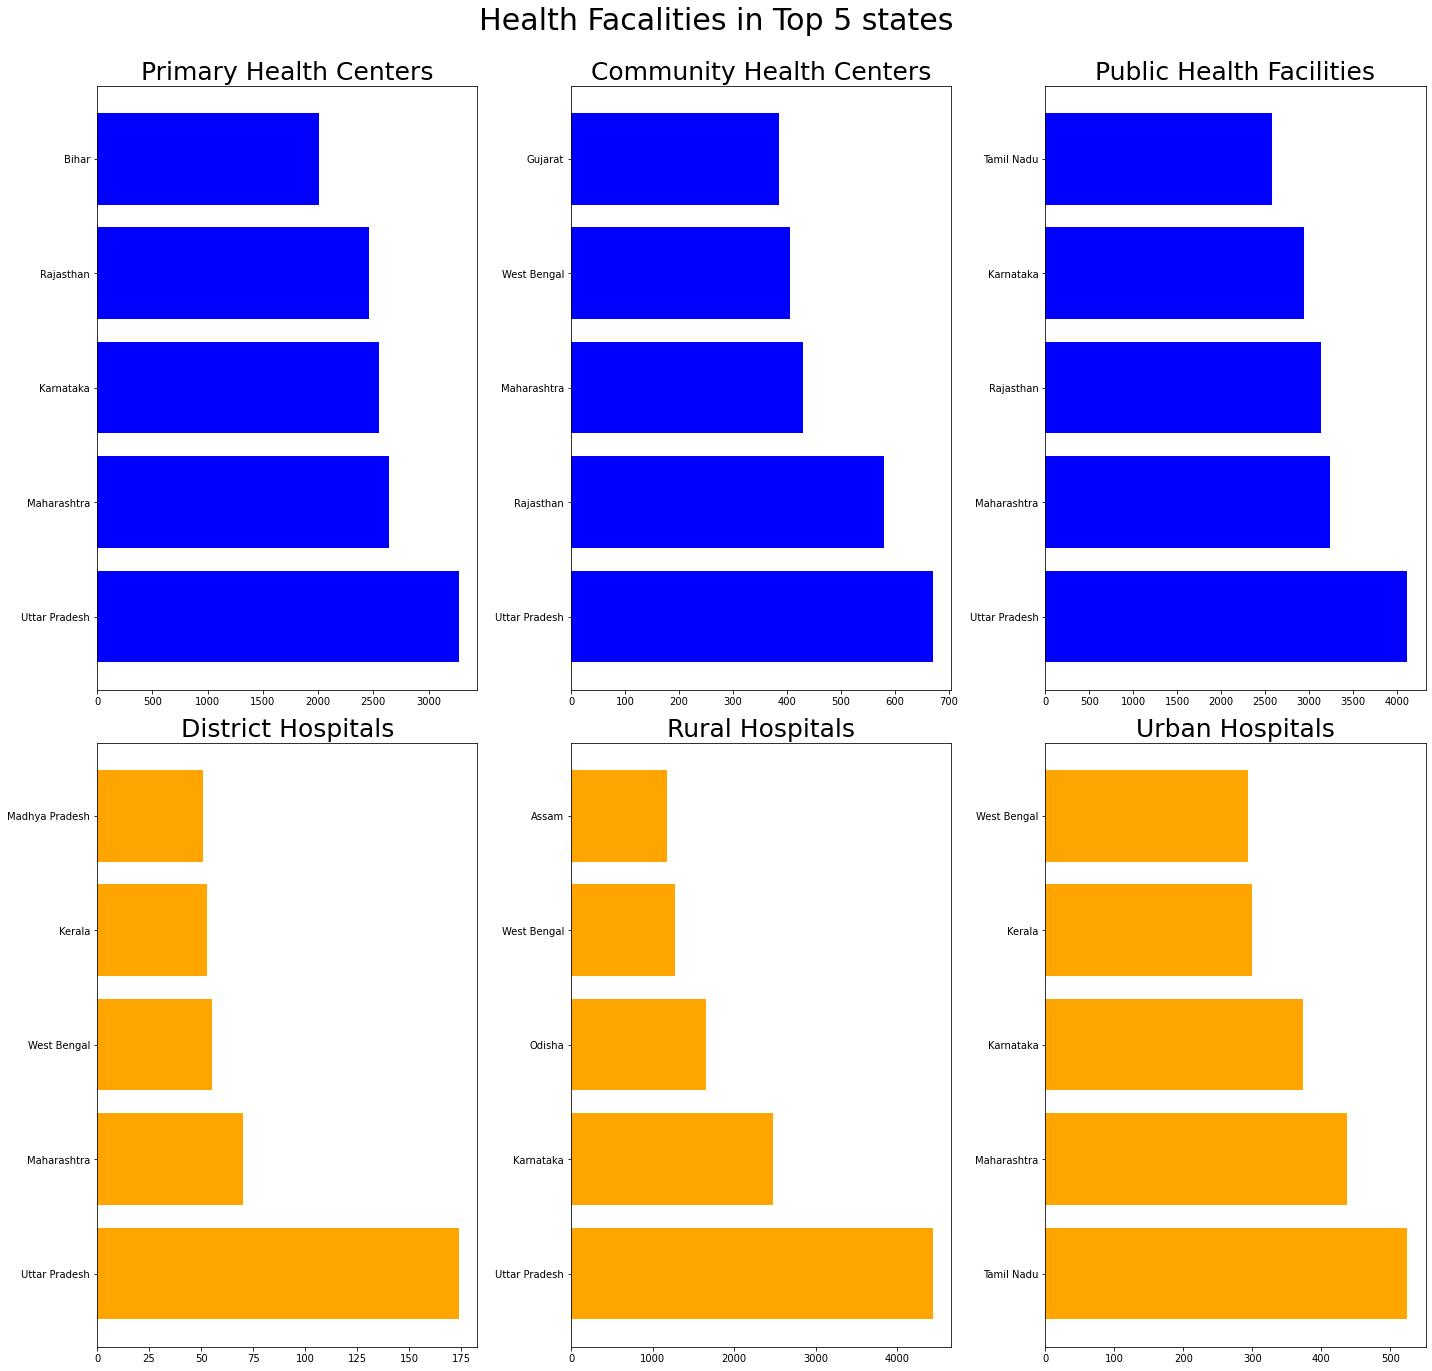

In [171]:
import plotly.graph_objects as go
hospital_beds_states =hospitals_beds.drop([36])
cols_object = list(hospital_beds_states.columns[2:8])
for cols in cols_object:
    hospital_beds_states[cols] = hospital_beds_states[cols].astype(int,errors = 'ignore')
top_5_primary = hospital_beds_states.nlargest(5,'NumPrimaryHealthCenters_HMIS')
top_5_community = hospital_beds_states.nlargest(5,'NumCommunityHealthCenters_HMIS')
top_5_district_hospitals = hospital_beds_states.nlargest(5,'NumDistrictHospitals_HMIS')
top_5_public_facility = hospital_beds_states.nlargest(5,'TotalPublicHealthFacilities_HMIS')
top_5_public_beds = hospital_beds_states.nlargest(5,'NumPublicBeds_HMIS')
top_rural_hos = hospital_beds_states.nlargest(5,'NumRuralHospitals_NHP18')
top_rural_beds = hospital_beds_states.nlargest(5,'NumRuralBeds_NHP18')
top_urban_hos = hospital_beds_states.nlargest(5,'NumUrbanHospitals_NHP18')
top_urban_beds = hospital_beds_states.nlargest(5,'NumUrbanBeds_NHP18')

plt.figure(figsize=(20,20))
plt.suptitle('Health Facalities in Top 5 states',fontsize=30)
plt.subplot(231)
plt.title('Primary Health Centers',fontsize=25)
plt.barh(top_5_primary['State/UT'],top_5_primary['NumPrimaryHealthCenters_HMIS'],color='blue')

plt.subplot(232)
plt.title('Community Health Centers',fontsize=25)
plt.barh(top_5_community['State/UT'],top_5_community['NumCommunityHealthCenters_HMIS'],color = 'blue')

plt.subplot(233)
plt.title('Public Health Facilities',fontsize=25)
plt.barh(top_5_public_facility['State/UT'],top_5_public_facility['TotalPublicHealthFacilities_HMIS'],color='blue')

plt.subplot(234)
plt.title('District Hospitals',fontsize=25)
plt.barh(top_5_district_hospitals['State/UT'],top_5_district_hospitals['NumDistrictHospitals_HMIS'],color = 'orange');

plt.subplot(235)
plt.title('Rural Hospitals',fontsize=25)
plt.barh(top_rural_hos['State/UT'],top_rural_hos['NumRuralHospitals_NHP18'],color = 'orange');

plt.subplot(236)
plt.title('Urban Hospitals',fontsize=25)
plt.barh(top_urban_hos['State/UT'],top_urban_hos['NumUrbanHospitals_NHP18'],color = 'orange');

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Statewise hospital beds for Covid-19 patients across India

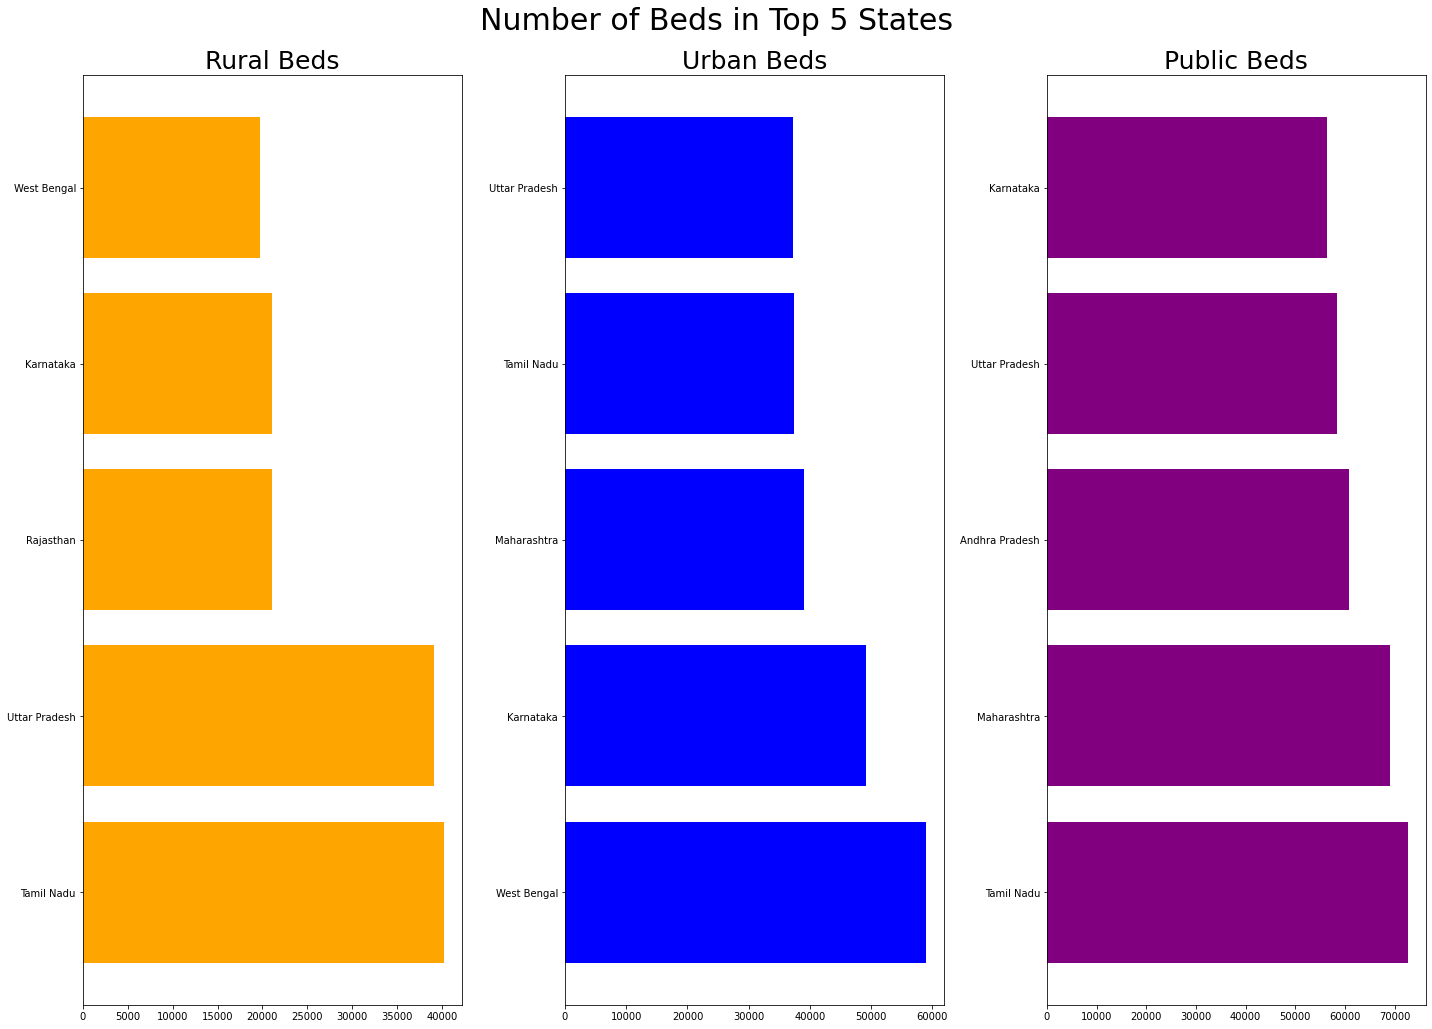

In [172]:
plt.figure(figsize=(20,15))

plt.suptitle('Number of Beds in Top 5 States',fontsize=30);
plt.subplot(131)
plt.title('Rural Beds',fontsize=25)
plt.barh(top_rural_beds['State/UT'],top_rural_beds['NumRuralBeds_NHP18'],color = 'orange');

plt.subplot(132)
plt.title('Urban Beds',fontsize=25)
plt.barh(top_urban_beds['State/UT'],top_urban_beds['NumUrbanBeds_NHP18'],color = 'blue');
plt.subplot(133)
plt.title('Public Beds',fontsize=25)
plt.barh(top_5_public_beds['State/UT'],top_5_public_beds['NumPublicBeds_HMIS'],color = 'purple');
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#  Prediction of Covid-19


# Prediction Using ARIMA Model

[Text(0, 0.5, 'Confirmed Cases'), Text(0.5, 0, 'Date')]

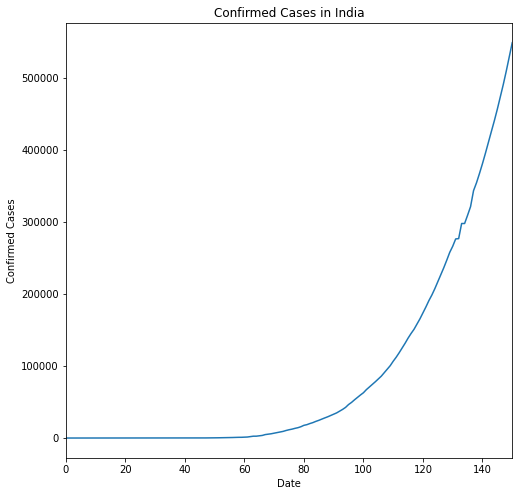

In [173]:
ax=num_plot_india['Confirmed'].plot(title='Confirmed Cases in India',figsize=(8,8));
ax.set(xlabel='Date',ylabel='Confirmed Cases')

In [174]:
train=num_plot_india.iloc[:-5,:2]
test=num_plot_india.iloc[-5:,:2]

In [175]:
train.rename(columns={"date":"ds","Confirmed":"y"},inplace=True)
test.rename(columns={"date":"ds","Confirmed":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

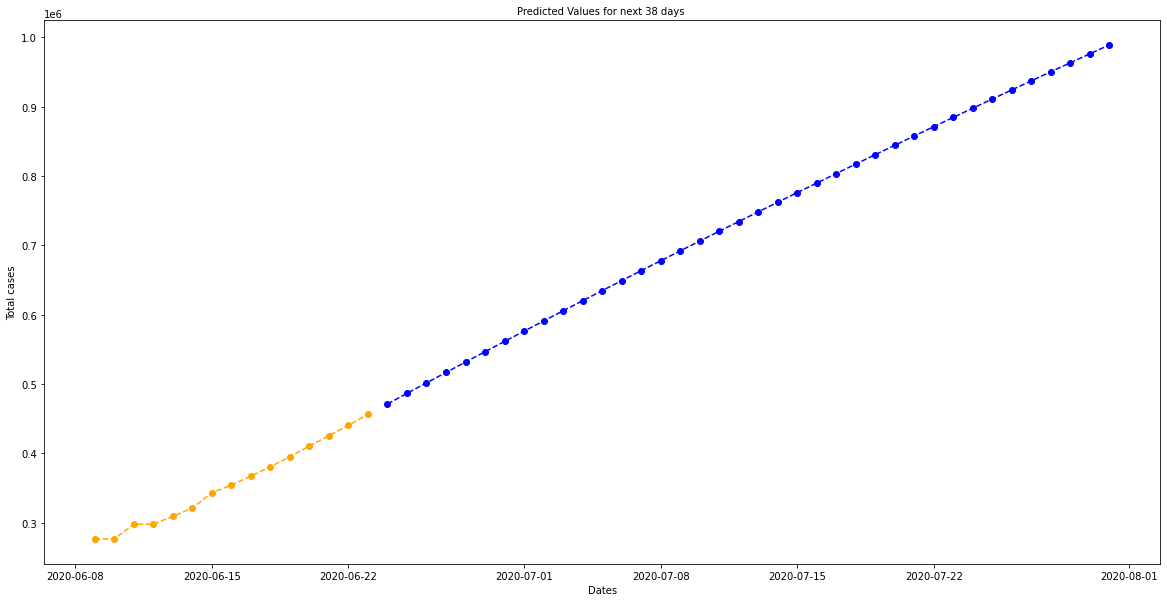

In [176]:
from statsmodels.tsa.arima_model import ARIMA
import datetime
arima = ARIMA(train['y'], order=(3, 1, 0))
arima=arima.fit(trend='nc', full_output= True,display=True)
forecast=arima.forecast(steps= 38)
pred=list(forecast[0])
start_date=train['ds'].max()
prediction_dates=[]
for i in range(38):
    date=start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date=date
plt.figure(figsize=(20,10))
plt.xlabel("Dates",fontsize=10)
plt.ylabel("Total cases",fontsize=10)
plt.title("Predicted Values for next 38 days ",fontsize=10)

plt.plot_date(y=pred,x=prediction_dates,linestyle='dashed',color='blue',label='Predicted')
plt.plot_date(y=train['y'].tail(15),x=train['ds'].tail(15),linestyle='dashed',color='orange',label='Actual')



In [177]:
pred=pd.DataFrame(forecast[0],columns=['Predicted'])
dates=pd.DataFrame(prediction_dates,columns=['Date'])
arima=pd.merge(dates,pred,right_index=True,left_index=True)
arima.tail(38)

Date      Predicted
0  2020-06-24  470976.438263
1  2020-06-25  486456.186693
2  2020-06-26  501438.917045
3  2020-06-27  516556.546169
4  2020-06-28  531523.364295
5  2020-06-29  546443.710309
6  2020-06-30  561295.128438
7  2020-07-01  576071.869545
8  2020-07-02  590786.118893
9  2020-07-03  605428.496928
10 2020-07-04  620005.391282
11 2020-07-05  634513.913257
12 2020-07-06  648955.803955
13 2020-07-07  663330.864738
14 2020-07-08  677639.506594
15 2020-07-09  691882.074196
16 2020-07-10  706058.809460
17 2020-07-11  720170.066842
18 2020-07-12  734216.117815
19 2020-07-13  748197.279800
20 2020-07-14  762113.845473
21 2020-07-15  775966.115744
22 2020-07-16  789754.387212
23 2020-07-17  803478.955330
24 2020-07-18  817140.114751
25 2020-07-19  830738.158168
26 2020-07-20  844273.377343
27 2020-07-21  857746.062448
28 2020-07-22  871156.502432
29 2020-07-23  884504.984861
30 2020-07-24  897791.795988
31 2020-07-25  911017.220742
32 2020-07-26  924181.542731
33 2020-07-27  937285.044258
34 2020-07-28  950328.006318
35 2020-07-29  963310.708610
36 2020-07-30  976233.429541
37 2020-07-31  989096.446230

In [178]:
test=test.reset_index()

In [179]:
test.head()

ds       y
0 2020-06-24  473105
1 2020-06-25  490401
2 2020-06-26  508953
3 2020-06-27  528859
4 2020-06-28  548318

In [180]:
df1=pd.DataFrame(forecast[0],columns=['yhat'])
df2=pd.DataFrame(prediction_dates,columns=['ds'])
df3=test['y']
df4=pd.merge(df2,df3,right_index=True,left_index=True)
df5=pd.merge(df4,df1,right_index=True,left_index=True)

In [181]:
df5['mse'],df5['rmse'],df5['mae'],df5['mape'],df5['mdape']=[0,0,0,0,0]

In [182]:
for t in range(len(test)):
    mape =  np.mean(np.abs(df5['yhat'][t] - df5['y'][t])/np.abs(df5['y'][t]))
    df5['mape'][t]="{:.5f}".format(mape)
    mdape =  np.median(np.abs(df5['yhat'][t] - df5['y'][t])/np.abs(df5['y'][t]))
    df5['mdape'][t]="{:.5f}".format(mdape)
    mae = np.mean(np.abs(df5['yhat'][t] - df5['y'][t]))
    df5['mae'][t]=mae
    mse = np.mean((df5['yhat'][t] - df5['y'][t])**2)
    df5['mse'][t]=mse
    rmse = np.mean((df5['yhat'][t] - df5['y'][t])**2)**.5
    df5['rmse'][t]=rmse

In [183]:
df5

ds       y           yhat        mse   rmse    mae     mape    mdape
0 2020-06-24  473105  470976.438263    4530775   2128   2128  0.00450  0.00450
1 2020-06-25  490401  486456.186693   15561552   3944   3944  0.00804  0.00804
2 2020-06-26  508953  501438.917045   56461442   7514   7514  0.01476  0.01476
3 2020-06-27  528859  516556.546169  151350370  12302  12302  0.02326  0.02326
4 2020-06-28  548318  531523.364295  282059788  16794  16794  0.03063  0.03063

# Prediction Using Fb Prophet Model

In [184]:
from fbprophet import Prophet
pd.plotting.register_matplotlib_converters()
model = Prophet(changepoint_prior_scale=0.4, changepoints=['2020-04-09','2020-04-15','2020-04-24','2020-05-05','2020-05-17','2020-05-31','2020-06-17',])
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [185]:
future_dates = model.make_future_dataframe(periods=38)
future_dates.tail()


ds
179 2020-07-27
180 2020-07-28
181 2020-07-29
182 2020-07-30
183 2020-07-31

In [186]:
forecast=model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(35)

ds          yhat     yhat_lower    yhat_upper
149 2020-06-27  5.236557e+05  520663.243924  5.271353e+05
150 2020-06-28  5.404177e+05  536950.065902  5.439039e+05
151 2020-06-29  5.571864e+05  553445.267411  5.610373e+05
152 2020-06-30  5.735982e+05  569630.041657  5.780121e+05
153 2020-07-01  5.897776e+05  585370.628640  5.945375e+05
154 2020-07-02  6.067648e+05  601801.267926  6.124328e+05
155 2020-07-03  6.226743e+05  616331.126227  6.307301e+05
156 2020-07-04  6.392833e+05  631376.976410  6.478302e+05
157 2020-07-05  6.560454e+05  646057.142924  6.668878e+05
158 2020-07-06  6.728141e+05  659854.996228  6.857829e+05
159 2020-07-07  6.892258e+05  672489.223710  7.045527e+05
160 2020-07-08  7.054052e+05  685448.629275  7.225470e+05
161 2020-07-09  7.223924e+05  699072.495515  7.426792e+05
162 2020-07-10  7.383019e+05  710888.549436  7.618783e+05
163 2020-07-11  7.549109e+05  724215.926631  7.810422e+05
164 2020-07-12  7.716730e+05  736342.931410  8.010771e+05
165 2020-07-13  7.884417e+05  750705.515115  8.196309e+05
166 2020-07-14  8.048535e+05  762981.600110  8.410920e+05
167 2020-07-15  8.210329e+05  775734.371720  8.599016e+05
168 2020-07-16  8.380201e+05  786615.501024  8.787229e+05
169 2020-07-17  8.539296e+05  801215.288808  8.974516e+05
170 2020-07-18  8.705386e+05  814025.040297  9.179902e+05
171 2020-07-19  8.873006e+05  826160.617921  9.380943e+05
172 2020-07-20  9.040693e+05  840067.965720  9.602217e+05
173 2020-07-21  9.204811e+05  852533.099166  9.810704e+05
174 2020-07-22  9.366605e+05  865810.280294  9.997477e+05
175 2020-07-23  9.536477e+05  877665.435976  1.022882e+06
176 2020-07-24  9.695572e+05  890038.832288  1.039531e+06
177 2020-07-25  9.861662e+05  902098.172892  1.059062e+06
178 2020-07-26  1.002928e+06  916099.046279  1.079292e+06
179 2020-07-27  1.019697e+06  928197.934410  1.102287e+06
180 2020-07-28  1.036109e+06  940270.591017  1.122343e+06
181 2020-07-29  1.052288e+06  951365.243091  1.142983e+06
182 2020-07-30  1.069275e+06  965315.843118  1.163492e+06
183 2020-07-31  1.085185e+06  972038.879413  1.184631e+06

In [187]:
from fbprophet.plot import plot_plotly
fig = plot_plotly(model, forecast) 
fig.update_layout(
                  autosize=False,
                  width= 750,
                  height= 850,
    title_text='<b>Covid-19 Total cases Forecast<b>',
    title_x=0.5,
    paper_bgcolor='khaki',
    plot_bgcolor = "khaki",)
fig.show()